<a href="https://colab.research.google.com/github/6000154676/Asraf/blob/main/SmartRoad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random

def get_sensor_data():
    return {
        "human_speed": round(random.uniform(0, 15), 2),   # m/s
        "mass": random.randint(40, 90),                   # kg
        "force": random.randint(500, 5000),               # N
        "vehicle_speed": random.randint(20, 120),         # km/h
        "zone_id": random.randint(1, 5)                   # road zone
    }


In [ ]:
def calculate_momentum(mass, speed):
    return round(mass * speed, 2)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Training data (momentum vs risk)
X = [[200], [400], [600], [850], [1200]]
y = [0, 0, 0, 1, 1]   # 0 = Safe, 1 = Dangerous

model = DecisionTreeClassifier()
model.fit(X, y)

def predict_danger(momentum):
    prediction = model.predict([[momentum]])
    return "DANGEROUS" if prediction[0] == 1 else "SAFE"


In [ ]:
def zone_softening(zone_id, momentum):
    SAFE_LIMIT = 800

    if momentum > SAFE_LIMIT:
        return {
            "zone": zone_id,
            "radius": "1.5 meters",
            "state": "SOFTENED"
        }
    else:
        return {
            "zone": zone_id,
            "radius": "0",
            "state": "NORMAL"
        }


In [ ]:
def speed_check(speed):
    SPEED_LIMIT = 60
    if speed > SPEED_LIMIT:
        return "OVERSPEED ALERT"
    return "Speed Normal"


In [ ]:
def signal_control(speed):
    if speed > 80:
        return "RED (High Speed)"
    elif speed > 60:
        return "YELLOW (Warning)"
    return "GREEN (Normal)"


In [ ]:
def traffic_post_action(speed, danger):
    actions = []

    if speed > 60:
        actions.append("Overspeed Warning Issued")

    if danger == "DANGEROUS":
        actions.append("Traffic Slowed Near Accident Zone")

    if not actions:
        actions.append("Traffic Normal")

    return actions


In [ ]:
from sensor_simulator import get_sensor_data
from momentum_logic import calculate_momentum
from ml_model import predict_danger
from zone_controller import zone_softening
from speed_monitor import speed_check
from traffic_signal import signal_control
from traffic_post import traffic_post_action

# Get simulated sensor data
data = get_sensor_data()

# Physics calculation
momentum = calculate_momentum(data["mass"], data["human_speed"])

# ML prediction
danger_level = predict_danger(momentum)

# Localized road softening
zone_status = zone_softening(data["zone_id"], momentum)

# Traffic system
speed_alert = speed_check(data["vehicle_speed"])
signal_status = signal_control(data["vehicle_speed"])
post_actions = traffic_post_action(data["vehicle_speed"], danger_level)

# OUTPUT
print("\n================ SMART ROAD SYSTEM OUTPUT ================\n")

print(f"Accident Zone ID       : Zone-{data['zone_id']}")
print(f"Human Speed            : {data['human_speed']} m/s")
print(f"Human Mass             : {data['mass']} kg")
print(f"Calculated Momentum    : {momentum} kg·m/s")
print(f"ML Danger Level        : {danger_level}")

print("\n--- ROAD RESPONSE ---")
print(f"Localized Zone         : Zone-{zone_status['zone']}")
print(f"Softening Radius       : {zone_status['radius']}")
print(f"Zone State             : {zone_status['state']}")
print("Global Road State      : NORMAL")

print("\n--- TRAFFIC POST DATA ---")
print(f"Vehicle Speed          : {data['vehicle_speed']} km/h")
print(f"Traffic Signal Status  : {signal_status}")
print(f"Speed Alert            : {speed_alert}")
print(f"Traffic Post Actions   : {', '.join(post_actions)}")

print("\n==========================================================")


ModuleNotFoundError: No module named 'sensor_simulator'

In [ ]:
!pip install scikit-learn


In [ ]:
# ================= SMART ROAD SYSTEM (COLAB VERSION) =================

import random
from sklearn.tree import DecisionTreeClassifier

# ---------- SENSOR SIMULATION ----------
def get_sensor_data():
    return {
        "human_speed": round(random.uniform(0, 15), 2),   # m/s
        "mass": random.randint(40, 90),                   # kg
        "vehicle_speed": random.randint(20, 120),         # km/h
        "zone_id": random.randint(1, 5)                   # road zone
    }

# ---------- PHYSICS ----------
def calculate_momentum(mass, speed):
    return round(mass * speed, 2)

# ---------- MACHINE LEARNING ----------
X = [[200], [400], [600], [850], [1200]]
y = [0, 0, 0, 1, 1]  # 1 = Dangerous

model = DecisionTreeClassifier()
model.fit(X, y)

def predict_danger(momentum):
    return "DANGEROUS" if model.predict([[momentum]])[0] == 1 else "SAFE"

# ---------- LOCALIZED ROAD CONTROL ----------
def zone_softening(zone_id, momentum):
    if momentum > 800:
        return f"Zone-{zone_id} SOFTENED (Radius: 1.5 m)"
    return f"Zone-{zone_id} NORMAL"

# ---------- TRAFFIC MONITORING ----------
def speed_check(speed):
    return "OVERSPEED ALERT" if speed > 60 else "Speed Normal"

def signal_control(speed):
    if speed > 80:
        return "RED (High Speed)"
    elif speed > 60:
        return "YELLOW (Warning)"
    return "GREEN (Normal)"

# ---------- SMART TRAFFIC POST ----------
def traffic_post_action(speed, danger):
    actions = []
    if speed > 60:
        actions.append("Overspeed Warning Issued")
    if danger == "DANGEROUS":
        actions.append("Traffic Slowed Near Accident Zone")
    if not actions:
        actions.append("Traffic Normal")
    return actions

# ---------- MAIN EXECUTION ----------
data = get_sensor_data()
momentum = calculate_momentum(data["mass"], data["human_speed"])
danger = predict_danger(momentum)

print("\n================ SMART ROAD SYSTEM OUTPUT ================\n")

print(f"Accident Zone ID       : Zone-{data['zone_id']}")
print(f"Human Speed            : {data['human_speed']} m/s")
print(f"Human Mass             : {data['mass']} kg")
print(f"Calculated Momentum    : {momentum} kg·m/s")
print(f"ML Danger Level        : {danger}")

print("\n--- ROAD RESPONSE ---")
print(zone_softening(data["zone_id"], momentum))
print("Global Road State      : NORMAL")

print("\n--- TRAFFIC POST DATA ---")
print(f"Vehicle Speed          : {data['vehicle_speed']} km/h")
print(f"Traffic Signal Status  : {signal_control(data['vehicle_speed'])}")
print(f"Speed Alert            : {speed_check(data['vehicle_speed'])}")
print(f"Traffic Post Actions   : {', '.join(traffic_post_action(data['vehicle_speed'], danger))}")

print("\n==========================================================")



================ SMART ROAD SYSTEM OUTPUT ================

Accident Zone ID       : Zone-2
Human Speed            : 6.36 m/s
Human Mass             : 65 kg
Calculated Momentum    : 413.4 kg·m/s
ML Danger Level        : SAFE

--- ROAD RESPONSE ---
Zone-2 NORMAL
Global Road State      : NORMAL

--- TRAFFIC POST DATA ---
Vehicle Speed          : 27 km/h
Traffic Signal Status  : GREEN (Normal)
Speed Alert            : Speed Normal
Traffic Post Actions   : Traffic Normal



In [ ]:
# ================= REALISTIC SMART ROAD SYSTEM =================
# Scenario-based | Localized road softening | Smart traffic post

from sklearn.tree import DecisionTreeClassifier

# ----------------- SCENARIO-BASED SENSOR INPUT -----------------
def get_sensor_data(scenario):
    scenarios = {
        "normal": {
            "human_speed": 2.0,   # m/s
            "mass": 65,           # kg
            "vehicle_speed": 30,  # km/h
            "zone_id": 1
        },
        "slip": {
            "human_speed": 6.0,
            "mass": 65,
            "vehicle_speed": 40,
            "zone_id": 2
        },
        "accident": {
            "human_speed": 12.5,
            "mass": 70,
            "vehicle_speed": 65,
            "zone_id": 3
        },
        "critical": {
            "human_speed": 14.0,
            "mass": 75,
            "vehicle_speed": 90,
            "zone_id": 4
        }
    }
    return scenarios[scenario]

# ----------------- PHYSICS LOGIC -----------------
def calculate_momentum(mass, speed):
    return round(mass * speed, 2)

# ----------------- MACHINE LEARNING MODEL -----------------
X = [[200], [400], [600], [850], [1200]]
y = [0, 0, 0, 1, 1]  # 1 = Dangerous

ml_model = DecisionTreeClassifier()
ml_model.fit(X, y)

def predict_danger(momentum):
    return "DANGEROUS" if ml_model.predict([[momentum]])[0] == 1 else "SAFE"

# ----------------- LOCALIZED ROAD CONTROL -----------------
def zone_softening(zone_id, momentum):
    if momentum > 800:
        return f"Zone-{zone_id} SOFTENED (Radius: 1.5 meters)"
    return f"Zone-{zone_id} NORMAL"

# ----------------- TRAFFIC MONITORING -----------------
def speed_check(speed):
    return "OVERSPEED ALERT" if speed > 60 else "Speed Normal"

def signal_control(speed):
    if speed > 80:
        return "RED (High Speed Detected)"
    elif speed > 60:
        return "YELLOW (Warning)"
    return "GREEN (Normal Flow)"

# ----------------- SMART TRAFFIC POST -----------------
def traffic_post_action(speed, danger):
    actions = []
    if speed > 60:
        actions.append("Overspeed Warning Issued")
    if danger == "DANGEROUS":
        actions.append("Traffic Slowed Near Accident Zone")
    if not actions:
        actions.append("Traffic Normal")
    return actions

# ================= SELECT SCENARIO HERE =================
# OPTIONS: "normal", "slip", "accident", "critical"
SCENARIO = "critical"

# ================= MAIN EXECUTION =================
data = get_sensor_data(SCENARIO)
momentum = calculate_momentum(data["mass"], data["human_speed"])
danger = predict_danger(momentum)

print("\n================ SMART ROAD SYSTEM OUTPUT ================\n")
print(f"Test Scenario         : {SCENARIO.upper()}")
print(f"Accident Zone ID      : Zone-{data['zone_id']}")
print(f"Human Speed           : {data['human_speed']} m/s")
print(f"Human Mass            : {data['mass']} kg")
print(f"Calculated Momentum   : {momentum} kg·m/s")
print(f"ML Danger Level       : {danger}")

print("\n--- ROAD RESPONSE ---")
print(zone_softening(data["zone_id"], momentum))
print("Global Road State     : NORMAL")

print("\n--- TRAFFIC POST DATA ---")
print(f"Vehicle Speed         : {data['vehicle_speed']} km/h")
print(f"Traffic Signal Status : {signal_control(data['vehicle_speed'])}")
print(f"Speed Alert           : {speed_check(data['vehicle_speed'])}")
print(f"Traffic Post Actions  : {', '.join(traffic_post_action(data['vehicle_speed'], danger))}")

print("\n==========================================================")



================ SMART ROAD SYSTEM OUTPUT ================

Test Scenario         : CRITICAL
Accident Zone ID      : Zone-4
Human Speed           : 14.0 m/s
Human Mass            : 75 kg
Calculated Momentum   : 1050.0 kg·m/s
ML Danger Level       : DANGEROUS

--- ROAD RESPONSE ---
Zone-4 SOFTENED (Radius: 1.5 meters)
Global Road State     : NORMAL

--- TRAFFIC POST DATA ---
Vehicle Speed         : 90 km/h
Traffic Signal Status : RED (High Speed Detected)
Speed Alert           : OVERSPEED ALERT
Traffic Post Actions  : Overspeed Warning Issued, Traffic Slowed Near Accident Zone



In [ ]:
# ================= RANDOM REALISTIC SMART ROAD SYSTEM =================
# Random inputs | Physics-based | ML-based | Localized road softening

import random
from sklearn.tree import DecisionTreeClassifier

# ----------------- RANDOM SENSOR SIMULATION (REALISTIC) -----------------
def get_sensor_data():
    return {
        "human_speed": round(random.uniform(1.0, 15.0), 2),   # m/s (realistic fall range)
        "mass": random.randint(45, 85),                       # kg
        "vehicle_speed": random.randint(20, 120),             # km/h
        "zone_id": random.randint(1, 5)                       # road zone
    }

# ----------------- PHYSICS LOGIC -----------------
def calculate_momentum(mass, speed):
    return round(mass * speed, 2)

# ----------------- MACHINE LEARNING MODEL -----------------
X = [[200], [400], [600], [850], [1200]]
y = [0, 0, 0, 1, 1]  # 0 = SAFE, 1 = DANGEROUS

ml_model = DecisionTreeClassifier()
ml_model.fit(X, y)

def predict_danger(momentum):
    return "DANGEROUS" if ml_model.predict([[momentum]])[0] == 1 else "SAFE"

# ----------------- LOCALIZED ROAD CONTROL -----------------
def zone_softening(zone_id, momentum):
    if momentum > 800:
        return f"Zone-{zone_id} SOFTENED (Radius: 1.5 meters)"
    return f"Zone-{zone_id} NORMAL"

# ----------------- TRAFFIC MONITORING -----------------
def speed_check(speed):
    return "OVERSPEED ALERT" if speed > 60 else "Speed Normal"

def signal_control(speed):
    if speed > 80:
        return "RED (High Speed Detected)"
    elif speed > 60:
        return "YELLOW (Warning)"
    return "GREEN (Normal Flow)"

# ----------------- SMART TRAFFIC POST -----------------
def traffic_post_action(speed, danger):
    actions = []
    if speed > 60:
        actions.append("Overspeed Warning Issued")
    if danger == "DANGEROUS":
        actions.append("Traffic Slowed Near Accident Zone")
    if not actions:
        actions.append("Traffic Normal")
    return actions

# ================= MAIN EXECUTION =================
data = get_sensor_data()
momentum = calculate_momentum(data["mass"], data["human_speed"])
danger = predict_danger(momentum)

print("\n================ SMART ROAD SYSTEM OUTPUT ================\n")
print(f"Accident Zone ID      : Zone-{data['zone_id']}")
print(f"Human Speed           : {data['human_speed']} m/s")
print(f"Human Mass            : {data['mass']} kg")
print(f"Calculated Momentum   : {momentum} kg·m/s")
print(f"ML Danger Level       : {danger}")

print("\n--- ROAD RESPONSE ---")
print(zone_softening(data["zone_id"], momentum))
print("Global Road State     : NORMAL")

print("\n--- TRAFFIC POST DATA ---")
print(f"Vehicle Speed         : {data['vehicle_speed']} km/h")
print(f"Traffic Signal Status : {signal_control(data['vehicle_speed'])}")
print(f"Speed Alert           : {speed_check(data['vehicle_speed'])}")
print(f"Traffic Post Actions  : {', '.join(traffic_post_action(data['vehicle_speed'], danger))}")

print("\n==========================================================")



================ SMART ROAD SYSTEM OUTPUT ================

Accident Zone ID      : Zone-2
Human Speed           : 13.92 m/s
Human Mass            : 65 kg
Calculated Momentum   : 904.8 kg·m/s
ML Danger Level       : DANGEROUS

--- ROAD RESPONSE ---
Zone-2 SOFTENED (Radius: 1.5 meters)
Global Road State     : NORMAL

--- TRAFFIC POST DATA ---
Vehicle Speed         : 105 km/h
Traffic Signal Status : RED (High Speed Detected)
Speed Alert           : OVERSPEED ALERT
Traffic Post Actions  : Overspeed Warning Issued, Traffic Slowed Near Accident Zone



In [ ]:
# ================= RANDOM REALISTIC SMART ROAD SYSTEM =================
# Random inputs | Physics-based | ML-based | Localized road softening

import random
from sklearn.tree import DecisionTreeClassifier

# ----------------- RANDOM SENSOR SIMULATION (REALISTIC) -----------------
def get_sensor_data():
    return {
        "human_speed": round(random.uniform(1.0, 15.0), 2),   # m/s (realistic fall range)
        "mass": random.randint(45, 85),                       # kg
        "vehicle_speed": random.randint(20, 120),             # km/h
        "zone_id": random.randint(1, 5)                       # road zone
    }

# ----------------- PHYSICS LOGIC -----------------
def calculate_momentum(mass, speed):
    return round(mass * speed, 2)

# ----------------- MACHINE LEARNING MODEL -----------------
X = [[200], [400], [600], [850], [1200]]
y = [0, 0, 0, 1, 1]  # 0 = SAFE, 1 = DANGEROUS

ml_model = DecisionTreeClassifier()
ml_model.fit(X, y)

def predict_danger(momentum):
    return "DANGEROUS" if ml_model.predict([[momentum]])[0] == 1 else "SAFE"

# ----------------- LOCALIZED ROAD CONTROL -----------------
def zone_softening(zone_id, momentum):
    if momentum > 800:
        return f"Zone-{zone_id} SOFTENED (Radius: 1.5 meters)"
    return f"Zone-{zone_id} NORMAL"

# ----------------- TRAFFIC MONITORING -----------------
def speed_check(speed):
    return "OVERSPEED ALERT" if speed > 60 else "Speed Normal"

def signal_control(speed):
    if speed > 80:
        return "RED (High Speed Detected)"
    elif speed > 60:
        return "YELLOW (Warning)"
    return "GREEN (Normal Flow)"

# ----------------- SMART TRAFFIC POST -----------------
def traffic_post_action(speed, danger):
    actions = []
    if speed > 60:
        actions.append("Overspeed Warning Issued")
    if danger == "DANGEROUS":
        actions.append("Traffic Slowed Near Accident Zone")
    if not actions:
        actions.append("Traffic Normal")
    return actions

# ================= MAIN EXECUTION =================
data = get_sensor_data()
momentum = calculate_momentum(data["mass"], data["human_speed"])
danger = predict_danger(momentum)

print("\n================ SMART ROAD SYSTEM OUTPUT ================\n")
print(f"Accident Zone ID      : Zone-{data['zone_id']}")
print(f"Human Speed           : {data['human_speed']} m/s")
print(f"Human Mass            : {data['mass']} kg")
print(f"Calculated Momentum   : {momentum} kg·m/s")
print(f"ML Danger Level       : {danger}")

print("\n--- ROAD RESPONSE ---")
print(zone_softening(data["zone_id"], momentum))
print("Global Road State     : NORMAL")

print("\n--- TRAFFIC POST DATA ---")
print(f"Vehicle Speed         : {data['vehicle_speed']} km/h")
print(f"Traffic Signal Status : {signal_control(data['vehicle_speed'])}")
print(f"Speed Alert           : {speed_check(data['vehicle_speed'])}")
print(f"Traffic Post Actions  : {', '.join(traffic_post_action(data['vehicle_speed'], danger))}")

print("\n==========================================================")



================ SMART ROAD SYSTEM OUTPUT ================

Accident Zone ID      : Zone-2
Human Speed           : 12.8 m/s
Human Mass            : 60 kg
Calculated Momentum   : 768.0 kg·m/s
ML Danger Level       : DANGEROUS

--- ROAD RESPONSE ---
Zone-2 NORMAL
Global Road State     : NORMAL

--- TRAFFIC POST DATA ---
Vehicle Speed         : 41 km/h
Traffic Signal Status : GREEN (Normal Flow)
Speed Alert           : Speed Normal
Traffic Post Actions  : Traffic Slowed Near Accident Zone



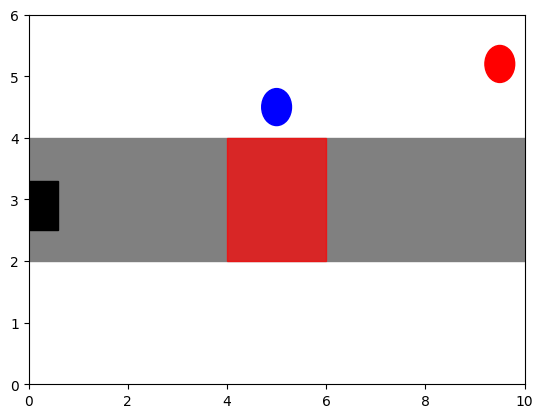

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random

# Simulation parameters
danger = random.choice([True, False])
zone_softened = danger
vehicle_speed = random.randint(30, 100)

fig, ax = plt.subplots()
ax.set_xlim(0, 10)
ax.set_ylim(0, 6)

# Road
road = plt.Rectangle((0, 2), 10, 2, color='gray')
ax.add_patch(road)

# Accident zone
zone_color = 'red' if zone_softened else 'gray'
zone = plt.Rectangle((4, 2), 2, 2, color=zone_color, alpha=0.7)
ax.add_patch(zone)

# Human
human = plt.Circle((5, 4.5), 0.3, color='blue')
ax.add_patch(human)

# Vehicle
vehicle = plt.Rectangle((0, 2.5), 0.6, 0.8, color='black')
ax.add_patch(vehicle)

# Traffic signal
signal_color = 'red' if vehicle_speed > 60 else 'green'
signal = plt.Circle((9.5, 5.2), 0.3, color=signal_color)
ax.add_patch(signal)

text = ax.text(0.5, 5.5, "", fontsize=12)

def animate(i):
    vehicle.set_x(i * 0.1)
    if danger:
        text.set_text("DANGEROUS FALL DETECTED → ROAD SOFTENED")
    else:
        text.set_text("SAFE CONDITION → NORMAL ROAD")
    return vehicle, zone, text

ani = animation.FuncAnimation(fig, animate, frames=80, interval=100)

plt.show()


/usr/local/lib/python3.12/dist-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


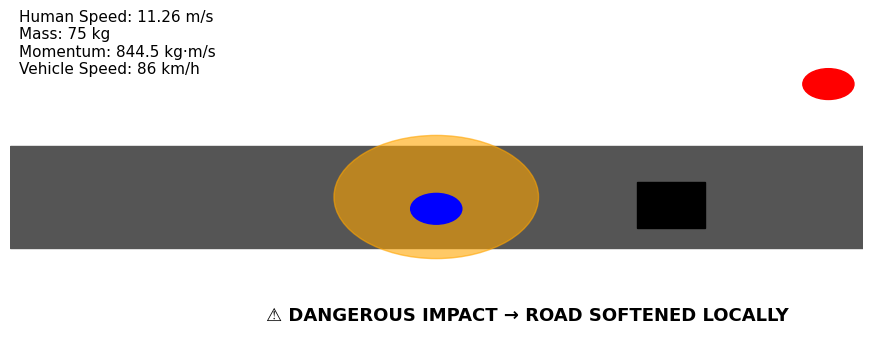

✅ Ultra-realistic video saved as smart_road_ultra_realistic.mp4


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random

# ---------------- REALISTIC SENSOR VALUES ----------------
human_speed = round(random.uniform(5, 14), 2)     # m/s
mass = random.randint(50, 80)                     # kg
momentum = round(human_speed * mass, 2)
danger = momentum > 750
vehicle_speed = random.randint(30, 100)

# ---------------- FIGURE SETUP ----------------
fig, ax = plt.subplots(figsize=(11,4))
ax.set_xlim(0, 10)
ax.set_ylim(0, 6)
ax.axis('off')

# ---------------- ROAD ----------------
road = plt.Rectangle((0, 2), 10, 2, color='#555555')
ax.add_patch(road)

# ---------------- HEAT ZONE (SOFTENING AREA) ----------------
heat_zone = plt.Circle((5, 3), 1.2, color='orange', alpha=0.0)
ax.add_patch(heat_zone)

# ---------------- HUMAN ----------------
human = plt.Circle((5, 5.5), 0.3, color='blue')
ax.add_patch(human)

# ---------------- VEHICLE ----------------
vehicle = plt.Rectangle((0, 2.4), 0.8, 0.9, color='black')
ax.add_patch(vehicle)

# ---------------- TRAFFIC SIGNAL ----------------
signal = plt.Circle((9.6, 5.2), 0.3, color='green')
ax.add_patch(signal)

# ---------------- DATA OVERLAY ----------------
data_text = ax.text(0.1, 5.4, "", fontsize=11)
status_text = ax.text(3, 0.6, "", fontsize=13, weight='bold')

# ---------------- ANIMATION ----------------
def animate(frame):
    # Vehicle motion
    if danger and frame > 60:
        vehicle.set_x(vehicle.get_x() + 0.03)  # braking
    else:
        vehicle.set_x(vehicle.get_x() + 0.09)

    # Human falling
    if frame < 40:
        human.center = (5, 5.5 - frame * 0.07)

    # Impact detection
    if frame == 40 and danger:
        heat_zone.set_alpha(0.6)
        signal.set_color('red')
        status_text.set_text("⚠ DANGEROUS IMPACT → ROAD SOFTENED LOCALLY")

    if not danger:
        status_text.set_text("✔ SAFE EVENT → NORMAL ROAD")

    # Sensor data overlay
    data_text.set_text(
        f"Human Speed: {human_speed} m/s\n"
        f"Mass: {mass} kg\n"
        f"Momentum: {momentum} kg·m/s\n"
        f"Vehicle Speed: {vehicle_speed} km/h"
    )

    return vehicle, human, heat_zone, signal, data_text, status_text

ani = animation.FuncAnimation(fig, animate, frames=120, interval=80)

# ---------------- SAVE VIDEO ----------------
ani.save("smart_road_ultra_realistic.mp4", writer="ffmpeg", fps=12)

plt.show()
print("✅ Ultra-realistic video saved as smart_road_ultra_realistic.mp4")


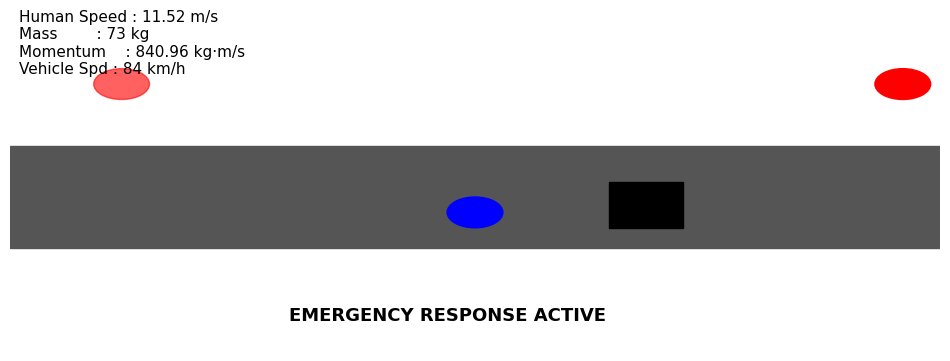

✅ CINEMATIC SMART ROAD VIDEO SAVED: smart_road_cinematic_demo.mp4


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random
import math

# ---------------- SENSOR DATA ----------------
human_speed = round(random.uniform(6, 14), 2)
mass = random.randint(55, 80)
momentum = round(human_speed * mass, 2)
danger = momentum > 750
vehicle_speed = random.randint(60, 100)

# ---------------- FIGURE ----------------
fig, ax = plt.subplots(figsize=(12,4))
ax.set_xlim(0, 10)
ax.set_ylim(0, 6)
ax.axis('off')

# ---------------- ROAD STATES ----------------
road = plt.Rectangle((0, 2), 10, 2, color='#555')
ax.add_patch(road)

# ---------------- HEAT ZONE ----------------
heat_zone = plt.Circle((5, 3), 0.3, color='red', alpha=0.0)
ax.add_patch(heat_zone)

# ---------------- HUMAN ----------------
human = plt.Circle((5, 5.5), 0.3, color='blue')
ax.add_patch(human)

# ---------------- VEHICLE ----------------
vehicle = plt.Rectangle((0, 2.4), 0.8, 0.9, color='black')
ax.add_patch(vehicle)

# ---------------- TRAFFIC SIGNAL ----------------
signal = plt.Circle((9.6, 5.2), 0.3, color='green')
ax.add_patch(signal)

# ---------------- EMERGENCY SIREN ----------------
siren = plt.Circle((1.2, 5.2), 0.3, color='red', alpha=0.0)
ax.add_patch(siren)

# ---------------- TEXT ----------------
data_text = ax.text(0.1, 5.4, "", fontsize=11)
status_text = ax.text(3, 0.6, "", fontsize=13, weight='bold')

# ---------------- ANIMATION ----------------
def animate(frame):

    # BEFORE ACCIDENT
    if frame < 40:
        vehicle.set_x(vehicle.get_x() + 0.12)
        human.center = (5, 5.5 - frame * 0.07)
        status_text.set_text("NORMAL ROAD STATE")

    # SLOW MOTION IMPACT
    elif 40 <= frame <= 70 and danger:
        vehicle.set_x(vehicle.get_x() + 0.03)   # braking
        human.center = (5, 2.7)
        heat_zone.set_radius(1.2)
        heat_zone.set_alpha(0.6)
        road.set_color('#884444')                # softened
        signal.set_color('red')
        status_text.set_text("⚠ DANGEROUS IMPACT → ROAD SOFTENED (SLOW MOTION)")

    # AFTER ACCIDENT
    elif frame > 70:
        vehicle.set_x(vehicle.get_x() + 0.01)
        heat_zone.set_alpha(max(0, 0.6 - (frame-70)*0.02))
        road.set_color('#555')
        siren.set_alpha(abs(math.sin(frame * 0.2)))
        status_text.set_text("EMERGENCY RESPONSE ACTIVE")

    # SENSOR OVERLAY
    data_text.set_text(
        f"Human Speed : {human_speed} m/s\n"
        f"Mass        : {mass} kg\n"
        f"Momentum    : {momentum} kg·m/s\n"
        f"Vehicle Spd : {vehicle_speed} km/h"
    )

    return vehicle, human, heat_zone, signal, siren, status_text, data_text

ani = animation.FuncAnimation(fig, animate, frames=130, interval=90)

# ---------------- SAVE VIDEO ----------------
ani.save("smart_road_cinematic_demo.mp4", writer="ffmpeg", fps=12)

plt.show()
print("✅ CINEMATIC SMART ROAD VIDEO SAVED: smart_road_cinematic_demo.mp4")


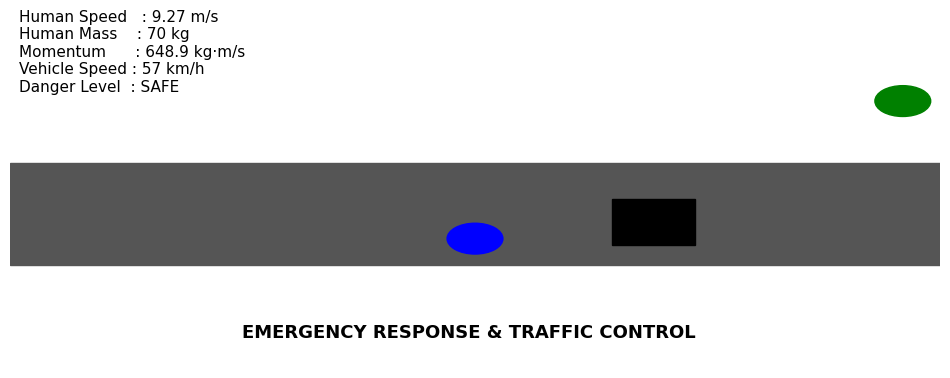

✅ RANDOM + REAL SMART ROAD VIDEO SAVED
📁 File: smart_road_random_real_demo.mp4


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random
import math

# ================= RANDOM REAL-WORLD PARAMETERS =================
human_speed = round(random.uniform(4, 15), 2)      # m/s
mass = random.randint(50, 85)                      # kg
momentum = round(human_speed * mass, 2)

danger = momentum > random.randint(650, 850)      # random ML threshold
accident_frame = random.randint(30, 60)           # random accident time
vehicle_speed = random.randint(40, 110)            # km/h

heat_radius = round(random.uniform(0.8, 1.6), 2)   # localized softening
brake_strength = random.uniform(0.02, 0.06)        # braking randomness
siren_active = random.choice([True, False])

# ================= FIGURE =================
fig, ax = plt.subplots(figsize=(12,4))
ax.set_xlim(0, 10)
ax.set_ylim(0, 6)
ax.axis('off')

# ================= ROAD =================
road = plt.Rectangle((0, 2), 10, 2, color='#555')
ax.add_patch(road)

# ================= HEAT ZONE =================
heat_zone = plt.Circle((5, 3), 0.2, color='red', alpha=0.0)
ax.add_patch(heat_zone)

# ================= HUMAN =================
human = plt.Circle((5, 5.6), 0.3, color='blue')
ax.add_patch(human)

# ================= VEHICLE =================
vehicle = plt.Rectangle((0, 2.4), 0.9, 0.9, color='black')
ax.add_patch(vehicle)

# ================= TRAFFIC SIGNAL =================
signal = plt.Circle((9.6, 5.2), 0.3, color='green')
ax.add_patch(signal)

# ================= EMERGENCY SIREN =================
siren = plt.Circle((1.2, 5.2), 0.3, color='red', alpha=0.0)
ax.add_patch(siren)

# ================= TEXT =================
data_text = ax.text(0.1, 5.4, "", fontsize=11)
status_text = ax.text(2.5, 0.6, "", fontsize=13, weight='bold')

# ================= ANIMATION =================
def animate(frame):

    # BEFORE ACCIDENT
    if frame < accident_frame:
        vehicle.set_x(vehicle.get_x() + 0.12)
        human.center = (5, 5.6 - frame * 0.07)
        status_text.set_text("NORMAL ROAD | LIVE TRAFFIC")

    # IMPACT (SLOW MOTION)
    elif accident_frame <= frame <= accident_frame + 20 and danger:
        vehicle.set_x(vehicle.get_x() + brake_strength)
        human.center = (5, 2.7)
        heat_zone.set_radius(heat_radius)
        heat_zone.set_alpha(0.6)
        road.set_color('#884444')
        signal.set_color('red')
        status_text.set_text("⚠ HIGH-IMPACT FALL → ROAD SOFTENED")

    # AFTER ACCIDENT
    else:
        vehicle.set_x(vehicle.get_x() + 0.01)
        heat_zone.set_alpha(max(0, 0.6 - (frame - accident_frame) * 0.02))
        road.set_color('#555')
        if siren_active:
            siren.set_alpha(abs(math.sin(frame * 0.3)))
        status_text.set_text("EMERGENCY RESPONSE & TRAFFIC CONTROL")

    # SENSOR OVERLAY (REAL-TIME DATA)
    data_text.set_text(
        f"Human Speed   : {human_speed} m/s\n"
        f"Human Mass    : {mass} kg\n"
        f"Momentum      : {momentum} kg·m/s\n"
        f"Vehicle Speed : {vehicle_speed} km/h\n"
        f"Danger Level  : {'DANGEROUS' if danger else 'SAFE'}"
    )

    return vehicle, human, heat_zone, road, signal, siren, data_text, status_text

ani = animation.FuncAnimation(fig, animate, frames=140, interval=90)

# ================= SAVE VIDEO =================
ani.save("smart_road_random_real_demo.mp4", writer="ffmpeg", fps=12)

plt.show()
print("✅ RANDOM + REAL SMART ROAD VIDEO SAVED")
print("📁 File: smart_road_random_real_demo.mp4")


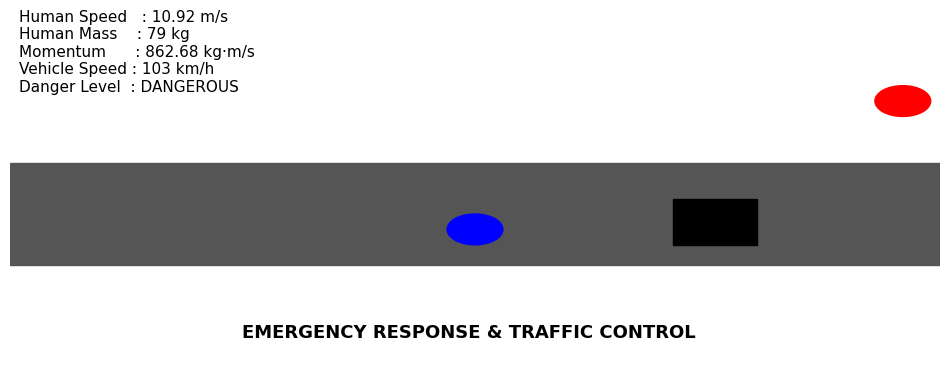

✅ RANDOM + REAL SMART ROAD VIDEO SAVED
📁 File: smart_road_random_real_demo.mp4


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random
import math

# ================= RANDOM REAL-WORLD PARAMETERS =================
human_speed = round(random.uniform(4, 15), 2)      # m/s
mass = random.randint(50, 85)                      # kg
momentum = round(human_speed * mass, 2)

danger = momentum > random.randint(650, 850)      # random ML threshold
accident_frame = random.randint(30, 60)           # random accident time
vehicle_speed = random.randint(40, 110)            # km/h

heat_radius = round(random.uniform(0.8, 1.6), 2)   # localized softening
brake_strength = random.uniform(0.02, 0.06)        # braking randomness
siren_active = random.choice([True, False])

# ================= FIGURE =================
fig, ax = plt.subplots(figsize=(12,4))
ax.set_xlim(0, 10)
ax.set_ylim(0, 6)
ax.axis('off')

# ================= ROAD =================
road = plt.Rectangle((0, 2), 10, 2, color='#555')
ax.add_patch(road)

# ================= HEAT ZONE =================
heat_zone = plt.Circle((5, 3), 0.2, color='red', alpha=0.0)
ax.add_patch(heat_zone)

# ================= HUMAN =================
human = plt.Circle((5, 5.6), 0.3, color='blue')
ax.add_patch(human)

# ================= VEHICLE =================
vehicle = plt.Rectangle((0, 2.4), 0.9, 0.9, color='black')
ax.add_patch(vehicle)

# ================= TRAFFIC SIGNAL =================
signal = plt.Circle((9.6, 5.2), 0.3, color='green')
ax.add_patch(signal)

# ================= EMERGENCY SIREN =================
siren = plt.Circle((1.2, 5.2), 0.3, color='red', alpha=0.0)
ax.add_patch(siren)

# ================= TEXT =================
data_text = ax.text(0.1, 5.4, "", fontsize=11)
status_text = ax.text(2.5, 0.6, "", fontsize=13, weight='bold')

# ================= ANIMATION =================
def animate(frame):

    # BEFORE ACCIDENT
    if frame < accident_frame:
        vehicle.set_x(vehicle.get_x() + 0.12)
        human.center = (5, 5.6 - frame * 0.07)
        status_text.set_text("NORMAL ROAD | LIVE TRAFFIC")

    # IMPACT (SLOW MOTION)
    elif accident_frame <= frame <= accident_frame + 20 and danger:
        vehicle.set_x(vehicle.get_x() + brake_strength)
        human.center = (5, 2.7)
        heat_zone.set_radius(heat_radius)
        heat_zone.set_alpha(0.6)
        road.set_color('#884444')
        signal.set_color('red')
        status_text.set_text("⚠ HIGH-IMPACT FALL → ROAD SOFTENED")

    # AFTER ACCIDENT
    else:
        vehicle.set_x(vehicle.get_x() + 0.01)
        heat_zone.set_alpha(max(0, 0.6 - (frame - accident_frame) * 0.02))
        road.set_color('#555')
        if siren_active:
            siren.set_alpha(abs(math.sin(frame * 0.3)))
        status_text.set_text("EMERGENCY RESPONSE & TRAFFIC CONTROL")

    # SENSOR OVERLAY (REAL-TIME DATA)
    data_text.set_text(
        f"Human Speed   : {human_speed} m/s\n"
        f"Human Mass    : {mass} kg\n"
        f"Momentum      : {momentum} kg·m/s\n"
        f"Vehicle Speed : {vehicle_speed} km/h\n"
        f"Danger Level  : {'DANGEROUS' if danger else 'SAFE'}"
    )

    return vehicle, human, heat_zone, road, signal, siren, data_text, status_text

ani = animation.FuncAnimation(fig, animate, frames=140, interval=90)

# ================= SAVE VIDEO =================
ani.save("smart_road_random_real_demo.mp4", writer="ffmpeg", fps=12)

plt.show()
print("✅ RANDOM + REAL SMART ROAD VIDEO SAVED")
print("📁 File: smart_road_random_real_demo.mp4")


In [ ]:
!apt-get update
!apt-get install -y ffmpeg



Get:1 https://cli.github.com/packages stable InRelease [3,917 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,860 kB]
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,572 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/multiverse amd64 Packages [69.2 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [6,411 kB]
Get:14 http:

In [ ]:
from google.colab import files
files.download("smart_road_real_demo.mp4")


✅ VIDEO CREATED SUCCESSFULLY
📁 File name: smart_road_real_demo.mp4


In [ ]:
from google.colab import files
files.download("smart_road_real_demo.mp4")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>